# **GIT_COMMITS_CHANGES**

This notebook the description of the table `GIT_COMMITS_CHANGES`.

First, we import the libraries we need and, then, we read the corresponding csv.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv('../../data/raw/GIT_COMMITS_CHANGES.csv')

We show the first rows of the table to get an idea of its content.

In [29]:
df.head()

,projectID,commitHash,oldPath,newPath,changeType,diff,linesAdded,linesRemoved,nloc,complexity,tokenCount,methods
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,NaN,Accumulo.README,ModificationType.ADD,"@@ -0,0 +1,196 @@\n+**************************...",196,0,145.0,0.0,1861.0,[]
1,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,NaN,bin/LogForwarder.sh,ModificationType.ADD,"@@ -0,0 +1,22 @@\n+#! /usr/bin/env bash\n+#\n+...",22,0,9.0,0.0,36.0,[]
2,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,NaN,bin/accumulo,ModificationType.ADD,"@@ -0,0 +1,87 @@\n+#! /usr/bin/env bash\n+\n+b...",87,0,69.0,1.0,562.0,['locationByProgram']
3,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,NaN,bin/check-slaves,ModificationType.ADD,"@@ -0,0 +1,167 @@\n+#! /usr/bin/env python\n+\...",167,0,154.0,0.0,1192.0,[]
4,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,NaN,bin/config.sh,ModificationType.ADD,"@@ -0,0 +1,96 @@\n+#! /usr/bin/env bash\n+#cop...",96,0,86.0,0.0,432.0,[]


In [30]:
df.shape

(891711, 12)

We create a function that tells us basic information of each attribute. Therefore, given an attribute of the table, we look its type, the number of unique values it has, the number of missing values, and a description (that is, the maximum and minimum values, and the quartiles).

In [31]:
def description(attributeName):
  print('Type: ', df[attributeName].dtype)
  print('Unique values: ', (df[attributeName].unique()).shape[0])
  print('NaN values: ', df[attributeName].isnull().sum())
  print('Description: ', df[attributeName].describe())

Next, for each attribute, we obtain the data mentioned above and we plot their distribution.

In some cases, we do not plot anything because there are lots of unique values of which we are not interested in the distribution, as they are categorical values.

#### projectID

Type:  object
Unique values:  33
NaN values:  0
Description:  count     891711
unique        33
top       ambari
freq      199377
Name: projectID, dtype: object


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32.]),
 <a list of 33 Text major ticklabel objects>)

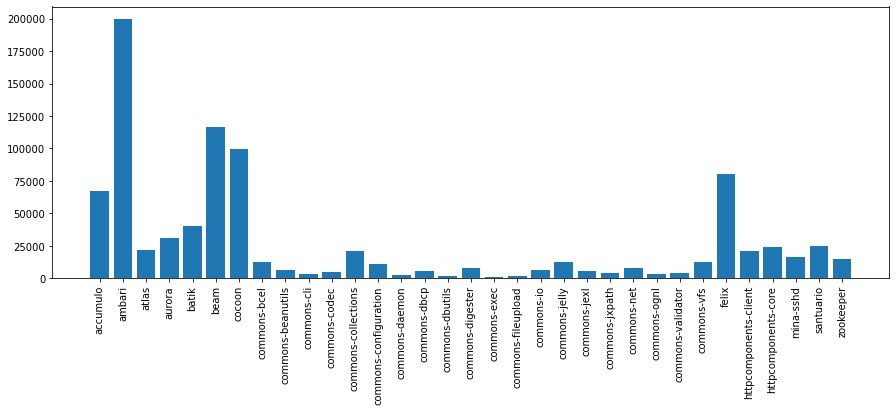

In [32]:
attribute = 'projectID'
description(attribute)

plt.figure(figsize=(15,5))
x, y = np.unique(df[attribute],return_counts=True)
plt.bar(x, y, tick_label=x)
plt.xticks(rotation='vertical')

#### commitHash

In [33]:
attribute = 'commitHash'
description(attribute)

Type:  object
Unique values:  128279
NaN values:  0
Description:  count                                       891711
unique                                      128279
top       a3eb94e3be8dd650cf1673298c77844ae99ca36e
freq                                          6066
Name: commitHash, dtype: object


#### oldPath

In [34]:
attribute = 'oldPath'
description(attribute)

Type:  object
Unique values:  179239
NaN values:  118672
Description:  count      773039
unique     179238
top       pom.xml
freq         6463
Name: oldPath, dtype: object


In [35]:
values = df[attribute][df[attribute].notnull()]
notnans = df[attribute].count()
nans = df[attribute].isna().sum()

([<matplotlib.patches.Wedge at 0x7fb90513ee20>,
 [Text(1.0052508862243392, 0.4466213785133678, 'NaN'),
  Text(-1.0052508653164824, -0.4466214255725576, 'paths')])

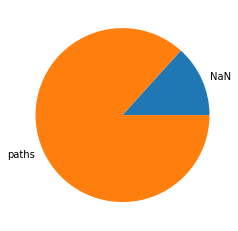

In [36]:
labels = 'NaN', 'paths'
plt.pie([nans, notnans], labels=labels)

#### newPath

In [37]:
attribute = 'newPath'
description(attribute)

Type:  object
Unique values:  197247
NaN values:  69131
Description:  count      822580
unique     197246
top       pom.xml
freq         6498
Name: newPath, dtype: object


In [38]:
values = df[attribute][df[attribute].notnull()]
notnans = df[attribute].count()
nans = df[attribute].isna().sum()

([<matplotlib.patches.Wedge at 0x7fb9043e2490>,
 [Text(1.0675352554752777, 0.2652705756719611, 'NaN'),
  Text(-1.0675352306388493, -0.265270675621824, 'paths')])

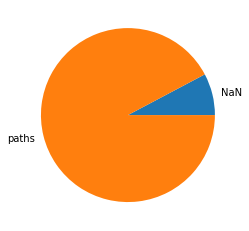

In [39]:
labels = 'NaN', 'paths'
plt.pie([nans, notnans], labels=labels)

#### changeType

Type:  object
Unique values:  5
NaN values:  0
Description:  count                      891711
unique                          5
top       ModificationType.MODIFY
freq                       609294
Name: changeType, dtype: object


<BarContainer object of 5 artists>

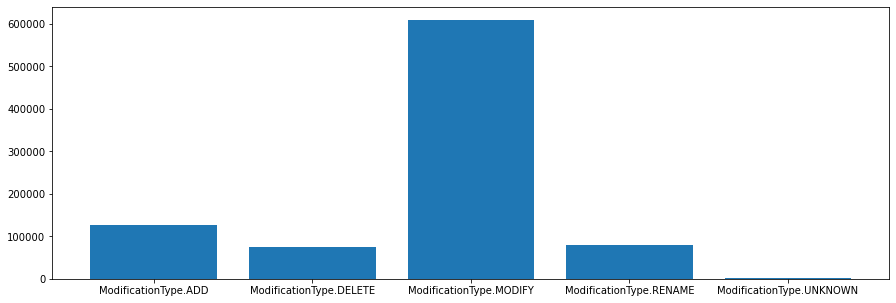

In [40]:
attribute = 'changeType'
description(attribute)

plt.figure(figsize=(15,5))
x, y = np.unique(df[attribute],return_counts=True)
plt.bar(x, y)

#### diff

In [41]:
attribute = 'diff'
description(attribute)

Type:  object
Unique values:  743259
NaN values:  62389
Description:  count                                                829322
unique                                               743258
top       @@ -1,4 +1,4 @@\n-/**\n+/*\n  * Licensed to th...
freq                                                   1768
Name: diff, dtype: object


([<matplotlib.patches.Wedge at 0x7fb842c6d730>,
 [Text(1.0735344421322528, 0.239841200705369, 'NaN'),
  Text(-1.0735344309044745, -0.23984125096114267, 'diff')])

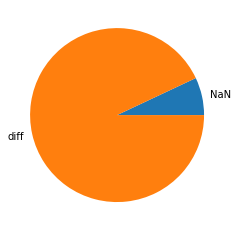

In [42]:
values = df[attribute][df[attribute].notnull()]
notnans = df[attribute].count()
nans = df[attribute].isna().sum()

labels = 'NaN', 'diff'
plt.pie([nans, notnans], labels=labels)

#### linesAdded

Type:  int64
Unique values:  2565
NaN values:  0
Description:  count    891711.000000
mean         38.113324
std         812.717041
min           0.000000
25%           1.000000
50%           3.000000
75%          16.000000
max      478967.000000
Name: linesAdded, dtype: float64


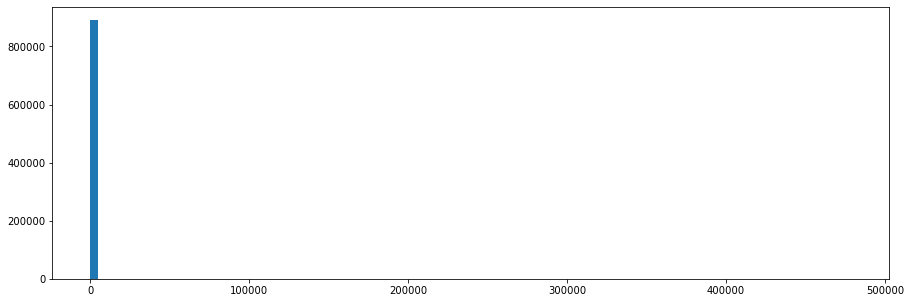

In [43]:
attribute = 'linesAdded'
description(attribute)

plt.figure(figsize=(15,5))
a = plt.hist(df[attribute], bins=100)

#### linesRemoved

Type:  int64
Unique values:  2407
NaN values:  0
Description:  count    891711.000000
mean         27.462699
std         624.294579
min           0.000000
25%           0.000000
50%           1.000000
75%           7.000000
max      478967.000000
Name: linesRemoved, dtype: float64


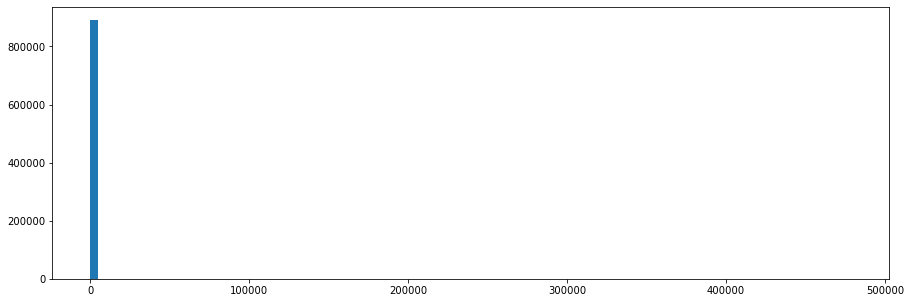

In [44]:
attribute = 'linesRemoved'
description(attribute)

plt.figure(figsize=(15,5))
a = plt.hist(df[attribute], bins=100)

#### nloc

Type:  float64
Unique values:  5373
NaN values:  135938
Description:  count    755773.000000
mean        267.350843
std        1481.099149
min           0.000000
25%          40.000000
50%          99.000000
75%         249.000000
max      478110.000000
Name: nloc, dtype: float64


/Users/laiaalborszumel/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/laiaalborszumel/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


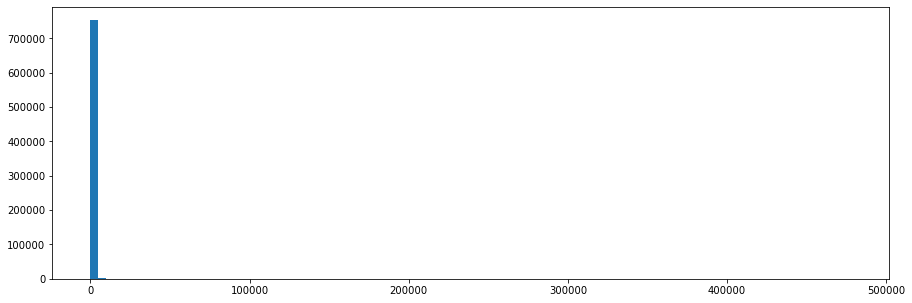

In [45]:
attribute = 'nloc'
description(attribute)

plt.figure(figsize=(15,5))
a = plt.hist(df[attribute], bins=100)

([<matplotlib.patches.Wedge at 0x7fb907912220>,
 [Text(0.976240394198449, 0.5069069862758424, 'NaN'),
  Text(-0.9762404179284766, -0.5069069405747308, 'nloc')])

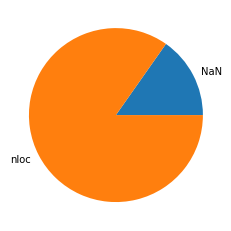

In [46]:
values = df[attribute][df[attribute].notnull()]
notnans = df[attribute].count()
nans = df[attribute].isna().sum()

labels = 'NaN', 'nloc'
plt.pie([nans, notnans], labels=labels)

#### complexity

Type:  float64
Unique values:  1191
NaN values:  135938
Description:  count    755773.000000
mean         31.890151
std         212.352904
min           0.000000
25%           0.000000
50%           7.000000
75%          27.000000
max       30800.000000
Name: complexity, dtype: float64


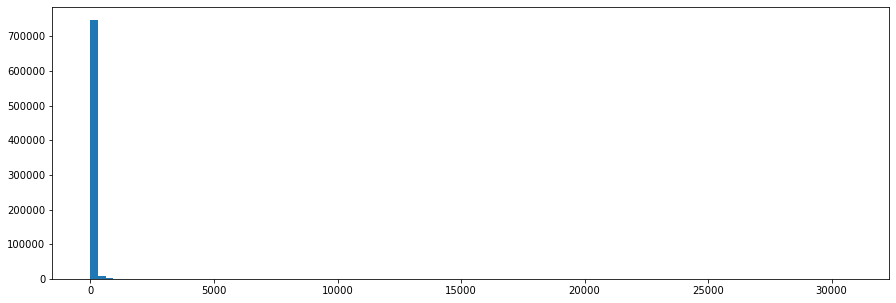

In [47]:
attribute = 'complexity'
description(attribute)

plt.figure(figsize=(15,5))
a = plt.hist(df[attribute], bins=100)

([<matplotlib.patches.Wedge at 0x7fb84402c7c0>,
 [Text(0.976240394198449, 0.5069069862758424, 'NaN'),
  Text(-0.9762404179284766, -0.5069069405747308, 'complexity')])

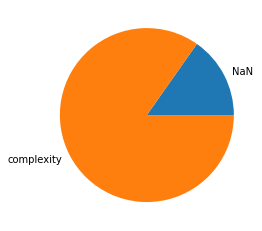

In [48]:
values = df[attribute][df[attribute].notnull()]
notnans = df[attribute].count()
nans = df[attribute].isna().sum()

labels = 'NaN', 'complexity'
plt.pie([nans, notnans], labels=labels)

#### tokenCount

Type:  float64
Unique values:  19893
NaN values:  135938
Description:  count    7.557730e+05
mean     1.975374e+03
std      1.179588e+04
min      0.000000e+00
25%      2.830000e+02
50%      7.340000e+02
75%      1.852000e+03
max      4.534351e+06
Name: tokenCount, dtype: float64


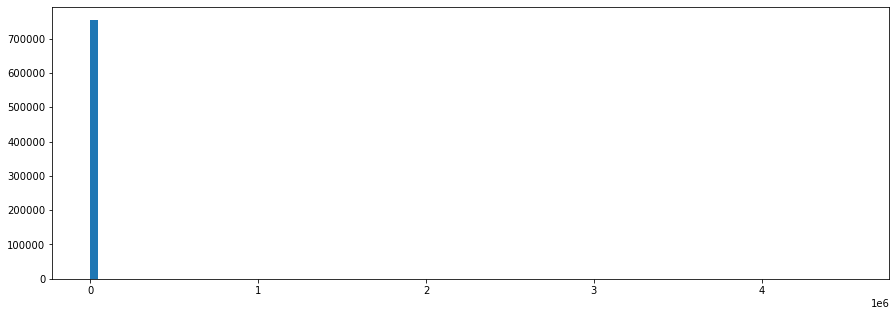

In [49]:
attribute = 'tokenCount'
description(attribute)

plt.figure(figsize=(15,5))
a = plt.hist(df[attribute], bins=100)

([<matplotlib.patches.Wedge at 0x7fb844297250>,
 [Text(0.976240394198449, 0.5069069862758424, 'NaN'),
  Text(-0.9762404179284766, -0.5069069405747308, 'token_count')])

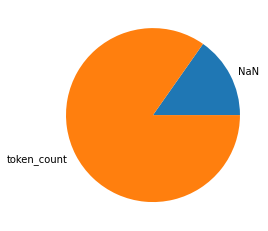

In [50]:
values = df[attribute][df[attribute].notnull()]
notnans = df[attribute].count()
nans = df[attribute].isna().sum()

labels = 'NaN', 'token_count'
plt.pie([nans, notnans], labels=labels)

#### methods

In [51]:
attribute = 'methods'
description(attribute)

Type:  object
Unique values:  130355
NaN values:  0
Description:  count     891711
unique    130355
top           []
freq      368373
Name: methods, dtype: object


#### linesAdded

Type:  int64
Unique values:  2565
NaN values:  0
Description:  count    891711.000000
mean         38.113324
std         812.717041
min           0.000000
25%           1.000000
50%           3.000000
75%          16.000000
max      478967.000000
Name: linesAdded, dtype: float64


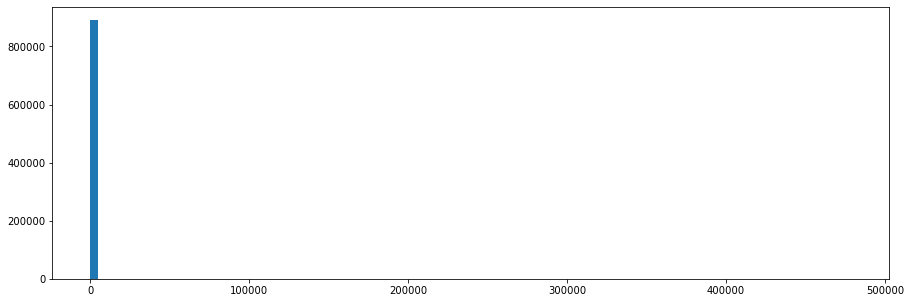

In [52]:
attribute = 'linesAdded'
description(attribute)

plt.figure(figsize=(15,5))
a = plt.hist(df[attribute], bins=100)